<a href="https://colab.research.google.com/github/nargeszaeri/Coursera_Capstone/blob/master/EMG_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysing EMG signals 
Import library 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 
from scipy import signal


# Import data from google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import file path

In [0]:
path ='/content/drive/My Drive/2020-01-31_Experiement.zip (Unzipped Files)/2020-01-31_Experiement/Trial_2/outputs/Left/DAQ_outputs.txt'
df_EMG_Left_T2= pd.read_csv(path)
print(df_EMG_Left_T2)

                                                Fri Jan 31 14:03:10 2020\t
 0.014228 -0.012560 -0.027680 -0.021928 0.0                            NaN
 0.010941 -0.009767 -0.029488 -0.018806 1.0                            NaN
          -0.009602 -0.022421 -0.018970 2.0                            NaN
 0.009626 -0.008616 -0.011739 -0.019299 3.0                            NaN
 0.005846 -0.008452 -0.006151 -0.018970 4.0                            NaN
...                                                                    ...
-0.006808 -0.006973  0.059752 -0.021271 4995.0                         NaN
 0.008969 -0.009767 -0.004179 -0.025873 4996.0                         NaN
-0.005658 -0.010588 -0.062851 -0.029324 4997.0                         NaN
 0.007161 -0.010753 -0.024558 -0.028995 4998.0                         NaN
-0.008945 -0.009438  0.035265 -0.023572 4999.0                         NaN

[5000 rows x 1 columns]


EMG data were sampled at 1000 Hz

In [0]:
df_EMG_Left_T2 = df_EMG_Left_T2.reset_index()
df_EMG_Left_T2.head()

,level_0,level_1,level_2,level_3,level_4,Fri Jan 31 14:03:10 2020\t
0,0.014228,-0.012560,-0.027680,-0.021928,0.0,NaN
1,0.010941,-0.009767,-0.029488,-0.018806,1.0,NaN
2,0.010941,-0.009602,-0.022421,-0.018970,2.0,NaN
3,0.009626,-0.008616,-0.011739,-0.019299,3.0,NaN
4,0.005846,-0.008452,-0.006151,-0.018970,4.0,NaN


In [0]:
df_EMG_Left_T2.columns.values.tolist()


['level_0',
 'level_1',
 'level_2',
 'level_3',
 'level_4',
 'Fri Jan 31 14:03:10 2020\t']

In [0]:
df_EMG_Left_T2=df_EMG_Left_T2.drop(['Fri Jan 31 14:03:10 2020\t'],axis=1)
df_EMG_Left_T2.head()

,level_0,level_1,level_2,level_3,level_4
0,0.014228,-0.012560,-0.027680,-0.021928,0.0
1,0.010941,-0.009767,-0.029488,-0.018806,1.0
2,0.010941,-0.009602,-0.022421,-0.018970,2.0
3,0.009626,-0.008616,-0.011739,-0.019299,3.0
4,0.005846,-0.008452,-0.006151,-0.018970,4.0


In [0]:
df_EMG_Left_T2=df_EMG_Left_T2.rename(columns={'level_0':'EMG1','level_1':'EMG2','level_2':'EMG3','level_3':'EMG4','level_4':'time'})
df_EMG_Left_T2.head()


,EMG1,EMG2,EMG3,EMG4,time
0,0.014228,-0.012560,-0.027680,-0.021928,0.0
1,0.010941,-0.009767,-0.029488,-0.018806,1.0
2,0.010941,-0.009602,-0.022421,-0.018970,2.0
3,0.009626,-0.008616,-0.011739,-0.019299,3.0
4,0.005846,-0.008452,-0.006151,-0.018970,4.0


In [0]:
emg1 = df_EMG_Left_T2['EMG1']
emg2 = df_EMG_Left_T2['EMG2']
emg3 = df_EMG_Left_T2['EMG3']
emg4 = df_EMG_Left_T2['EMG4']
time = df_EMG_Left_T2['time']        #milisecond 
Time = df_EMG_Left_T2['time']/1000   # time in second


Plot EMG signal

In [0]:
df_EMG_Left_T2.shape

(5000, 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes

Text(0.5, 0, 'Time (sec)')

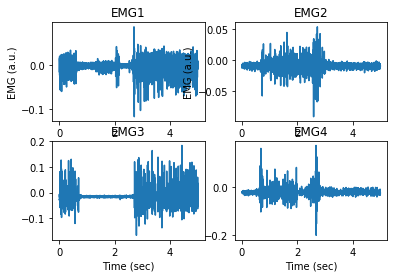

In [0]:
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 1).set_title('EMG1')
plt.plot(Time, emg1)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-.5, .5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 2)
plt.subplot(2, 2, 2).set_title('EMG2')
plt.plot(Time, emg2)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 3)
plt.subplot(2, 2, 3).set_title('EMG3')
plt.plot(Time, emg3)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 4)
plt.subplot(2, 2, 4).set_title('EMG4')
plt.plot(Time, emg4)
#plt.locator_params(axis='x', nbins=4)
#plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')

#Remove Mean EMG 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versio

Text(0.5, 0, 'Time (sec)')

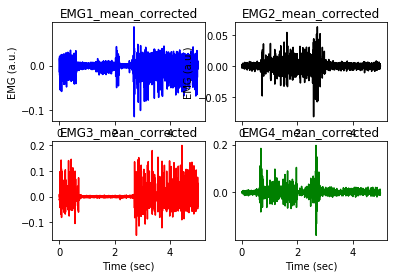

In [0]:
emg1_correctmean = emg1 - np.mean(emg1)
emg2_correctmean = emg2 - np.mean(emg2)
emg3_correctmean = emg3 - np.mean(emg3)
emg4_correctmean = emg4 - np.mean(emg4)

fig2 = plt.figure()
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 1).set_title('EMG1_mean_corrected')
plt.plot(Time, emg1_correctmean, color= 'blue')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-.5, .5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 2)
plt.subplot(2, 2, 2).set_title('EMG2_mean_corrected')
plt.plot(Time, emg2_correctmean, color= 'black')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 3)
plt.subplot(2, 2, 3).set_title('EMG3_mean_corrected')
plt.plot(Time, emg3_correctmean, color='red')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 4)
plt.subplot(2, 2, 4).set_title('EMG4_mean_corrected')
plt.plot(Time, emg4_correctmean, color= 'green')
#plt.locator_params(axis='x', nbins=4)
#plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')


#Filter EMG signal

create bandpass filter for EMG

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

Text(0.5, 0, 'Time (sec)')

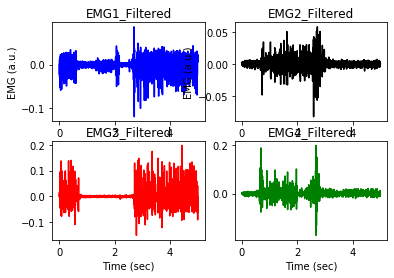

In [0]:
# create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# process EMG signal: filter EMG

emg1_filtered = sp.signal.filtfilt(b, a, emg1_correctmean)
emg2_filtered = sp.signal.filtfilt(b, a, emg2_correctmean)
emg3_filtered = sp.signal.filtfilt(b, a, emg3_correctmean)
emg4_filtered = sp.signal.filtfilt(b, a, emg4_correctmean)

#Plot Filtered signal

fig2 = plt.figure()
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 1).set_title('EMG1_Filtered')
plt.plot(Time, emg1_filtered, color= 'blue')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-.5, .5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 2)
plt.subplot(2, 2, 2).set_title('EMG2_Filtered')
plt.plot(Time, emg2_filtered, color= 'black')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 3)
plt.subplot(2, 2, 3).set_title('EMG3_Filtered')
plt.plot(Time, emg3_filtered, color='red')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 4)
plt.subplot(2, 2, 4).set_title('EMG4_Filtered')
plt.plot(Time, emg4_filtered, color= 'green')
#plt.locator_params(axis='x', nbins=4)
#plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')

#Rectify EMG Signal
Take the absolute of all EMG values



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

Text(0.5, 0, 'Time (sec)')

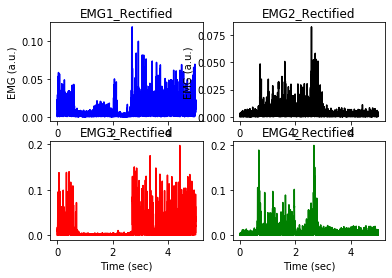

In [0]:
# process EMG signal: rectify
emg1_rectified = abs(emg1_filtered)
emg2_rectified = abs(emg2_filtered)
emg3_rectified = abs(emg3_filtered)
emg4_rectified = abs(emg4_filtered)

#Plot Rectified signal

fig2 = plt.figure()
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 1).set_title('EMG1_Rectified')
plt.plot(Time, emg1_rectified, color= 'blue')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-.5, .5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 2)
plt.subplot(2, 2, 2).set_title('EMG2_Rectified')
plt.plot(Time, emg2_rectified, color= 'black')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 3)
plt.subplot(2, 2, 3).set_title('EMG3_Rectified')
plt.plot(Time, emg3_rectified, color='red')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')

plt.subplot(2, 2, 4)
plt.subplot(2, 2, 4).set_title('EMG4_Rectified')
plt.plot(Time, emg4_rectified, color= 'green')
#plt.locator_params(axis='x', nbins=4)
#plt.locator_params(axis='y', nbins=4)
#plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
#plt.ylabel('EMG (a.u.)')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

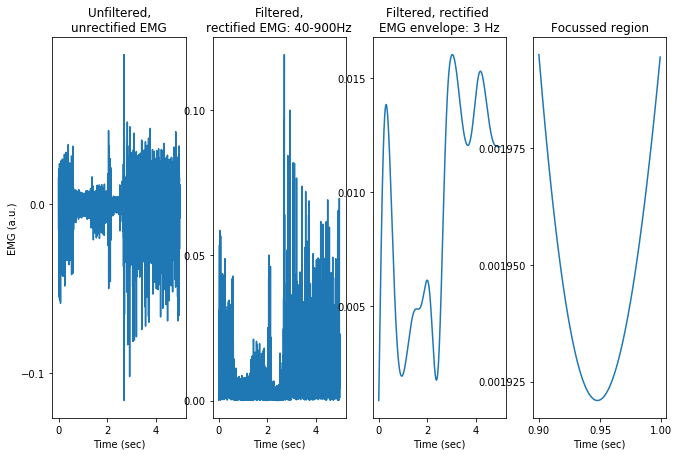

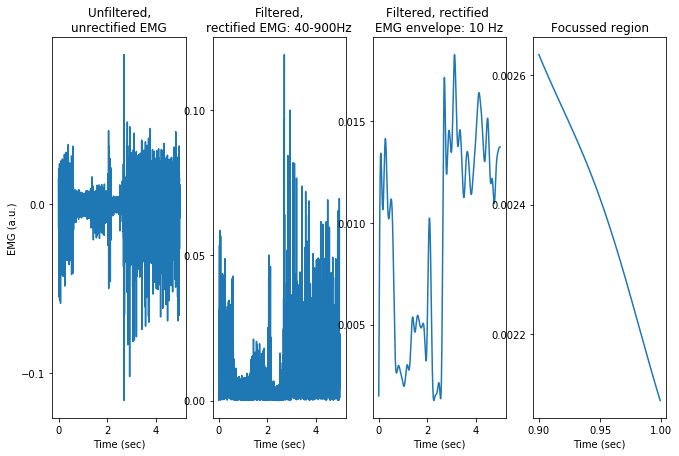

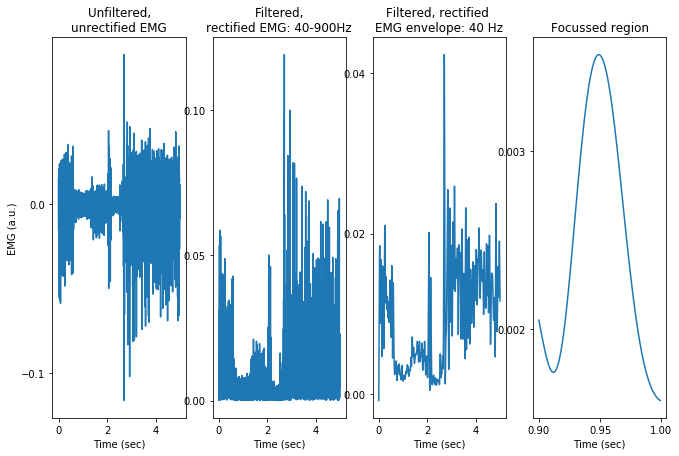

In [0]:
def filteremg(time, emg1, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg1_filtered = sp.signal.filtfilt(b1, a1, emg1)    
    
    # process EMG signal: rectify
    emg1_rectified = abs(emg1_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg1_envelope = sp.signal.filtfilt(b2, a2, emg1_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(Time, emg1)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    #plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(Time, emg1_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    #plt.ylim(-1.5, 1.5)
    #plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(Time, emg1_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    #plt.ylim(-1.5, 1.5)
    #plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    
    plt.subplot(1, 4, 4)
    plt.subplot(1, 4, 4).set_title('Focussed region')
    plt.plot(Time[int(0.9*1000):int(1.0*1000)], emg1_envelope[int(0.9*1000):int(1.0*1000)])
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    #plt.xlim(0.9, 1.0)
    #plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
for i in [3, 10, 40]:
    filteremg(Time, emg1_correctmean, low_pass=i)